# Preamble

In [36]:
if __name__ == '__main__':    
    #from google.colab import drive
    #drive.mount('/content/drive')
    #%cd drive/My\ Drive/Recommenders
    
    #!pip install pytorch-lightning
    #!pip install optuna
    
    import os
    import io
    import pickle
    import warnings
    from copy import deepcopy
    from zipfile import ZipFile
    from datetime import datetime
    warnings.filterwarnings("ignore")
    from IPython.display import clear_output
    
    import torch
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import KFold
    
    from uncertain.utils.data import Data
    from uncertain.utils.training import train
    from uncertain.utils.evaluation import test
    from uncertain.explicit import Bias, MF, CPMF, OrdRec, BeMF
    from uncertain.extras import Ensemble, Resample, UncertainWrapper, UserHeuristic, ItemHeuristic
    
    import seaborn as sns
    from matplotlib import pyplot as plt
    from matplotlib.colors import TABLEAU_COLORS
    
    clear_output()
    
    #os.chdir('Movielens')
    #if os.path.isfile('data.pkl'):
    #    with open('data.pkl', 'rb') as f:
    #        data = pickle.load(f)
    #    print(f'Data prepared: {data.n_user} users, {data.n_item} items.')
    #    print(f'{len(data.train)} train, {len(data.val)} validation and {len(data.test)} test interactions.')
    #else:
    
        #data = Data(data, users_on_test=None, test_ratio=0.2, val_ratio=0.2, implicit=False, batch_size=int(1e5), distances=True)
    
    #data = pd.read_csv('C:\\Users\\Jacob\\Documents\\Recommender Systems - Home Folder\\ml-1m\\ratings.csv', index_col=0)
    #data = pd.read_csv('C:\\Users\\Jacob\\Documents\\Recommender Systems - Home Folder\\ml-10M\\ratings.csv', index_col=0)
    data = pd.read_csv('C:\\Users\\Jacob\\Documents\\Recommender Systems - Home Folder\\ml-25m\\ratings.csv')
    
    
    data.columns = ['user', 'item', 'score', 'timestamps']
    print(data.head())
    data = Data(data, implicit=False, users_on_test=10000)
    
    with open('data.pkl', 'wb') as f:
        pickle.dump(data, f, protocol=4)

   user  item  score  timestamps
0     1   296    5.0  1147880044
1     1   306    3.5  1147868817
2     1   307    5.0  1147868828
3     1   665    5.0  1147878820
4     1   899    3.5  1147868510


100%|██████████| 162541/162541 [1:39:15<00:00, 27.29it/s]   


Data prepared: 162541 users, 32720 items.
19777302 train, 4866016 validation and 302552 test interactions.


In [11]:
checkpoints_path = "checkpoints" + "25m"
results_path = "results" + "25m"

In [14]:
baseline_path = checkpoints_path + '/baseline'

In [19]:
checkpoints_path

'checkpoints25m'

# Training

In [17]:
# Load baseline
files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(baseline_path)}
baseline = MF(data.n_user, data.n_item, embedding_dim=1, lr=0, weight_decay=0)
baseline = baseline.load_from_checkpoint(os.path.join(baseline_path, min(files, key=files.get)))

## Baseline

In [16]:
if __name__ == '__main__':
    for dim in [50, 100, 200]:
        for wd in [0.1, 0.01, 0.001]:
            model = MF(data.n_user, data.n_item, embedding_dim=dim, lr=0.0001, weight_decay=wd)
            train(model, data, path=baseline_path, name=f'dim={dim}-wd={wd}')
    
    files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(baseline_path)}
    model = MF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0)
    model = model.load_from_checkpoint(os.path.join(baseline_path, min(files, key=files.get)))
    test(model, data, name='Baseline', max_k=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 199: 100%|██████████| 246/246 [02:28<00:00,  1.66it/s, loss=6.07e+04, v_num=64, val_loss=0.750]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 246/246 [02:28<00:00,  1.66it/s, loss=6.07e+04, v_num=64, val_loss=0.750]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 199: 100%|██████████| 246/246 [02:26<00:00,  1.68it/s, loss=5.65e+04, v_num=65, val_loss=0.677]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 246/246 [02:26<00:00,  1.68it/s, loss=5.65e+04, v_num=65, val_loss=0.677]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 199: 100%|██████████| 246/246 [02:25<00:00,  1.69it/s, loss=5.63e+04, v_num=66, val_loss=0.673]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 246/246 [02:26<00:00,  1.68it/s, loss=5.63e+04, v_num=66, val_loss=0.673]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 199: 100%|██████████| 246/246 [02:42<00:00,  1.52it/s, loss=4.73e+04, v_num=67, val_loss=0.718]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 246/246 [02:42<00:00,  1.52it/s, loss=4.73e+04, v_num=67, val_loss=0.718]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 198: 100%|██████████| 246/246 [02:39<00:00,  1.55it/s, loss=4.13e+04, v_num=68, val_loss=0.650]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 196: 100%|██████████| 246/246 [02:39<00:00,  1.55it/s, loss=4.1e+04, v_num=69, val_loss=0.647] 


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 150: 100%|██████████| 246/246 [02:57<00:00,  1.39it/s, loss=4.14e+04, v_num=70, val_loss=0.712]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 141: 100%|██████████| 246/246 [02:58<00:00,  1.37it/s, loss=3.63e+04, v_num=71, val_loss=0.644]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 140: 100%|██████████| 246/246 [02:51<00:00,  1.43it/s, loss=3.6e+04, v_num=72, val_loss=0.641] 


Baseline - Recommending: 100%|██████████| 10000/10000 [06:45<00:00, 24.65it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'results/Baseline.pkl'

In [5]:
#model = MF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0)
#model = model.load_from_checkpoint(os.path.join(baseline_path, min(files, key=files.get)))
#test(model, data, name='Baseline', max_k=10)

Baseline - Recommending: 100%|██████████| 1000/1000 [00:03<00:00, 256.59it/s]


{'RMSE': 0.9461292137956872,
 'Rating_rec': {'MAP': array([0.084     , 0.1085    , 0.11641667, 0.12025   , 0.12254306,
         0.12352361, 0.12602425, 0.12599408, 0.12615089, 0.12780603]),
  'Recall': array([0.00415959, 0.00822706, 0.01162712, 0.01487657, 0.01710158,
         0.01973667, 0.02298763, 0.02618823, 0.03048248, 0.03717573])}}

## Ensemble

In [20]:
if __name__ == '__main__':
    for i in range(4):
        model = MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=baseline.lr, weight_decay=baseline.weight_decay)
        train(model, data, path=checkpoints_path + '/ensemble', name=f'{i}')
        
    models = [baseline]
    for file in os.listdir(checkpoints_path + '/ensemble'):
        models.append(MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=0, weight_decay=0))
        models[-1] = models[-1].load_from_checkpoint(os.path.join(checkpoints_path + '/ensemble', file))
    ensemble = Ensemble(models)
    test(ensemble, data, name='ENSEMBLE', max_k=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 139: 100%|██████████| 246/246 [02:57<00:00,  1.38it/s, loss=3.61e+04, v_num=73, val_loss=0.641]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 140: 100%|██████████| 246/246 [02:54<00:00,  1.41it/s, loss=3.59e+04, v_num=74, val_loss=0.642]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 140: 100%|██████████| 246/246 [02:55<00:00,  1.40it/s, loss=3.62e+04, v_num=75, val_loss=0.640]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 141: 100%|██████████| 246/246 [02:49<00:00,  1.45it/s, loss=3.54e+04, v_num=76, val_loss=0.641]


ENSEMBLE - Recommending: 100%|██████████| 10000/10000 [18:51<00:00,  8.84it/s]


## Resample

In [21]:
if __name__ == '__main__':
    og = deepcopy(data.train)
    for i in range(5):
        data.train = og[np.random.choice(len(og), int(0.8*len(og)), replace=False), :]
        model = MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=baseline.lr, weight_decay=baseline.weight_decay)
        train(model, data, path=checkpoints_path + '/resample', name=f'{i}')
    data.train = og
    
    # Resample
    models = []
    for file in os.listdir(checkpoints_path + '/resample'):
        models.append(MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=0, weight_decay=0))
        models[-1] = models[-1].load_from_checkpoint(os.path.join(checkpoints_path + '/resample', file))
    resample = Resample(baseline, models)
    test(resample, data, name='RESAMPLE', max_k=10) # problem with "use_baseline=True"

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 155: 100%|██████████| 207/207 [02:22<00:00,  1.45it/s, loss=3.59e+04, v_num=77, val_loss=0.659]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 157: 100%|██████████| 207/207 [02:22<00:00,  1.46it/s, loss=3.54e+04, v_num=78, val_loss=0.658]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 157: 100%|██████████| 207/207 [02:17<00:00,  1.50it/s, loss=3.59e+04, v_num=79, val_loss=0.659]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 156: 100%|██████████| 207/207 [02:17<00:00,  1.51it/s, loss=3.55e+04, v_num=80, val_loss=0.660]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 156: 100%|██████████| 207/207 [02:26<00:00,  1.42it/s, loss=3.59e+04, v_num=81, val_loss=0.658]


RESAMPLE - Recommending: 100%|██████████| 10000/10000 [21:38<00:00,  7.70it/s]


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[7], line 14
     12     models[-1] = models[-1].load_from_checkpoint(os.path.join('checkpoints/resample', file))
     13 resample = Resample(baseline, models)
---> 14 test(resample, data, name='RESAMPLE', max_k=10, use_baseline=True)

TypeError: test() got an unexpected keyword argument 'use_baseline'

In [7]:
#test(resample, data, name='RESAMPLE', max_k=10)

## Cross-Validation

In [24]:
if __name__ == '__main__':
    errors = np.empty(len(data.train))
    og = deepcopy(data.train)
    og_val = deepcopy(data.val)
    for i, (train_idx, test_idx) in enumerate(KFold(n_splits=2, shuffle=True).split(data.train)):
        test_rat = og[test_idx]
        data.train = og[train_idx]
        model = MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=baseline.lr, weight_decay=baseline.weight_decay)
        train(model, data, path=checkpoints_path + '/cv', name=f'cv{i}')
        errors[test_idx] = np.abs(model.predict(torch.tensor(test_rat[:, 0]).long(), torch.tensor(test_rat[:, 1]).long()) - test_rat[:, 2])
    data.train = deepcopy(og)
    data.train[:, 2] = errors
    data.val[:, 2] = np.abs(model.predict(torch.tensor(data.val[:, 0]).long(), torch.tensor(data.val[:, 1]).long()) - data.val[:, 2])
    
    # DoubleMF
    model = MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=baseline.lr, weight_decay=baseline.weight_decay)
    train(model, data, path=checkpoints_path + '/cv', name=f'MF')
    
    # Bias
    model = Bias(data.n_user, data.n_item, lr=baseline.lr)
    train(model, data, path=checkpoints_path + '/cv', name=f'Bias')
    
    #Fix
    data.train = og
    data.val = og_val
    
    # Zhu
    for file in os.listdir(checkpoints_path + '/cv'):
        if 'Bias' in file:
            bias = Bias(data.n_user, data.n_item, lr=0)
            bias = bias.load_from_checkpoint(os.path.join(checkpoints_path + '/cv', file))
        elif 'MF' in file:
            mf = MF(data.n_user, data.n_item, embedding_dim=baseline.embedding_dim, lr=0, weight_decay=0)
            mf = mf.load_from_checkpoint(os.path.join(checkpoints_path + '/cv', file))
    bias_cv = UncertainWrapper(baseline, bias)
    test(bias_cv, data, name='CV-Bias', max_k=10) #, use_baseline=True)
    mf_cv = UncertainWrapper(baseline, mf)
    test(mf_cv, data, name='CV-PMF', max_k=10) #, use_baseline=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 199: 100%|██████████| 147/147 [01:37<00:00,  1.51it/s, loss=3.55e+04, v_num=82, val_loss=0.701]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 147/147 [01:37<00:00,  1.51it/s, loss=3.55e+04, v_num=82, val_loss=0.701]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 199: 100%|██████████| 147/147 [01:38<00:00,  1.49it/s, loss=3.56e+04, v_num=83, val_loss=0.700]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 147/147 [01:38<00:00,  1.49it/s, loss=3.56e+04, v_num=83, val_loss=0.700]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 47: 100%|██████████| 246/246 [02:50<00:00,  1.44it/s, loss=1.86e+04, v_num=84, val_loss=0.278]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type      | Params
----------------------------------------
0 | user_bias | Embedding | 162 K 
1 | item_bias | Embedding | 32.7 K
----------------------------------------
195 K     Trainable params
0         Non-trainable params
195 K     Total params
0.781     Total estimated model params size (MB)


Epoch 199: 100%|██████████| 246/246 [02:20<00:00,  1.75it/s, loss=2.38e+04, v_num=85, val_loss=0.278]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 246/246 [02:20<00:00,  1.75it/s, loss=2.38e+04, v_num=85, val_loss=0.278]


CV-PMF - Recommending: 100%|██████████| 10000/10000 [11:36<00:00, 14.36it/s]


In [8]:
#bias_cv = UncertainWrapper(baseline, bias)
#test(bias_cv, data, name='CV-Bias', max_k=10)
#mf_cv = UncertainWrapper(baseline, mf)
#test(mf_cv, data, name='CV-PMF', max_k=10)

## CPMF

In [25]:
if __name__ == '__main__':
    for dim in [50, 100, 200]:
        for lr in [5e-6, 1e-6]:
            model = CPMF(data.n_user, data.n_item, embedding_dim=dim, lr=0.0002, weight_decay=0, lr_var=lr)
            train(model, data, path=checkpoints_path + '/cpmf', name=f'dim={dim}-lr={lr}')
    
    ''' '''
    files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(checkpoints_path + '/cpmf')}
    model = CPMF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0)
    model = model.load_from_checkpoint(os.path.join(checkpoints_path + '/cpmf', min(files, key=files.get)))
    test(model, data, name='CPMF', max_k=10)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | user_gammas     | Embedding | 162 K 
3 | item_gammas     | Embedding | 32.7 K
4 | var_activation  | Softplus  | 0     
----------------------------------------------
10.0 M    Trainable params
0         Non-trainable params
10.0 M    Total params
39.833    Total estimated model params size (MB)


Epoch 12:   0%|          | 0/246 [00:00<?, ?it/s, loss=nan, v_num=86, val_loss=nan.0]               

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:24<00:00,  1.70it/s, loss=nan, v_num=86, val_loss=nan.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | user_gammas     | Embedding | 162 K 
3 | item_gammas     | Embedding | 32.7 K
4 | var_activation  | Softplus  | 0     
----------------------------------------------
10.0 M    Trainable params
0         Non-trainable params
10.0 M    Total params
39.833    Total estimated model params size (MB)


Epoch 20: 100%|██████████| 246/246 [02:24<00:00,  1.70it/s, loss=3.96e+04, v_num=87, val_loss=0.863]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
2 | user_gammas     | Embedding | 162 K 
3 | item_gammas     | Embedding | 32.7 K
4 | var_activation  | Softplus  | 0     
----------------------------------------------
19.7 M    Trainable params
0         Non-trainable params
19.7 M    Total params
78.885    Total estimated model params size (MB)


Epoch 12:   0%|          | 0/246 [00:00<?, ?it/s, loss=nan, v_num=88, val_loss=nan.0]               

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:26<00:00,  1.68it/s, loss=nan, v_num=88, val_loss=nan.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
2 | user_gammas     | Embedding | 162 K 
3 | item_gammas     | Embedding | 32.7 K
4 | var_activation  | Softplus  | 0     
----------------------------------------------
19.7 M    Trainable params
0         Non-trainable params
19.7 M    Total params
78.885    Total estimated model params size (MB)


Epoch 19: 100%|██████████| 246/246 [02:26<00:00,  1.68it/s, loss=2.93e+04, v_num=89, val_loss=0.875]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
2 | user_gammas     | Embedding | 162 K 
3 | item_gammas     | Embedding | 32.7 K
4 | var_activation  | Softplus  | 0     
----------------------------------------------
39.2 M    Trainable params
0         Non-trainable params
39.2 M    Total params
156.990   Total estimated model params size (MB)


Epoch 12:   0%|          | 0/246 [00:00<?, ?it/s, loss=nan, v_num=90, val_loss=nan.0]               

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:40<00:00,  1.53it/s, loss=nan, v_num=90, val_loss=nan.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
2 | user_gammas     | Embedding | 162 K 
3 | item_gammas     | Embedding | 32.7 K
4 | var_activation  | Softplus  | 0     
----------------------------------------------
39.2 M    Trainable params
0         Non-trainable params
39.2 M    Total params
156.990   Total estimated model params size (MB)


Epoch 19: 100%|██████████| 246/246 [02:41<00:00,  1.53it/s, loss=1.82e+04, v_num=91, val_loss=0.899]


CPMF - Recommending: 100%|██████████| 10000/10000 [09:23<00:00, 17.74it/s]


## OrdRec

In [26]:
if __name__ == '__main__':
    ''' '''
    data.to_ordinal()
    for wd in [0.0001]:
        for lr in [0.00005]:
            model = OrdRec(data.n_user, data.n_item, data.score_labels, embedding_dim=50, lr=0.0001, weight_decay=wd, lr_step=lr)
            train(model, data, path=checkpoints_path + '/ordrec', name=f'wd={wd}-lr={lr}')
    
    score_labels = pd.factorize(data.train[:, 2], sort=True)[1]
    files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(checkpoints_path + '/ordrec')}
    model = OrdRec(data.n_user, data.n_item, score_labels=score_labels, embedding_dim=0)
    model = model.load_from_checkpoint(os.path.join(checkpoints_path + '/ordrec', min(files, key=files.get)))
    test(model, data, name='OrdRec', max_k=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | user_step       | Embedding | 1.5 M 
----------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.904    Total estimated model params size (MB)


Epoch 26: 100%|██████████| 246/246 [02:24<00:00,  1.70it/s, loss=1.73e+05, v_num=92, val_loss=inf.0]


OrdRec - Recommending: 100%|██████████| 10000/10000 [08:56<00:00, 18.64it/s]


## BeMF

In [28]:
if __name__ == '__main__':
    data.to_ordinal()
    for dim in [50, 100, 200]:  
        for wd in [0.001, 0.0001]:
            for lr in [0.001, 0.005]:
                model = BeMF(data.n_user, data.n_item, data.score_labels, embedding_dim=dim, lr=lr, weight_decay=wd)
                train(model, data, path=checkpoints_path + '/bemf', name=f'dim={dim}-wd={wd}-lr={lr}')
    
    score_labels = pd.factorize(data.train[:, 2], sort=True)[1]
    files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(checkpoints_path + '/bemf')}
    model = BeMF(data.n_user, data.n_item, score_labels=score_labels, embedding_dim=20)
    model = model.load_from_checkpoint(os.path.join(checkpoints_path + '/bemf', min(files, key=files.get)))
    test(model, data, name='BeMF', max_k=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 75: 100%|██████████| 246/246 [02:30<00:00,  1.63it/s, loss=2.74e+05, v_num=96, val_loss=2.860]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 19: 100%|██████████| 246/246 [02:30<00:00,  1.63it/s, loss=2.74e+05, v_num=97, val_loss=2.860]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 63: 100%|██████████| 246/246 [02:30<00:00,  1.63it/s, loss=2.74e+05, v_num=98, val_loss=2.850]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 8.1 M 
1 | item_embeddings | Embedding | 1.6 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
9.8 M     Trainable params
0         Non-trainable params
9.8 M     Total params
39.052    Total estimated model params size (MB)


Epoch 19:   0%|          | 0/246 [00:00<?, ?it/s, loss=2.73e+05, v_num=99, val_loss=2.850]          

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:29<00:00,  1.64it/s, loss=2.73e+05, v_num=99, val_loss=2.860]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 43: 100%|██████████| 246/246 [02:35<00:00,  1.58it/s, loss=2.73e+05, v_num=100, val_loss=2.860]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 14:   0%|          | 0/246 [00:00<?, ?it/s, loss=2.71e+05, v_num=101, val_loss=2.870]          

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:39<00:00,  1.54it/s, loss=2.68e+05, v_num=101, val_loss=2.880]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 43: 100%|██████████| 246/246 [02:39<00:00,  1.55it/s, loss=2.72e+05, v_num=102, val_loss=2.860]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 16.3 M
1 | item_embeddings | Embedding | 3.3 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
19.5 M    Trainable params
0         Non-trainable params
19.5 M    Total params
78.104    Total estimated model params size (MB)


Epoch 13:   0%|          | 0/246 [00:00<?, ?it/s, loss=2.71e+05, v_num=103, val_loss=2.860]          

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:35<00:00,  1.58it/s, loss=2.67e+05, v_num=103, val_loss=2.870]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 29: 100%|██████████| 246/246 [02:53<00:00,  1.41it/s, loss=2.71e+05, v_num=104, val_loss=2.870]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 11:   0%|          | 0/246 [00:00<?, ?it/s, loss=2.66e+05, v_num=105, val_loss=2.880]          

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:58<00:00,  1.38it/s, loss=2.61e+05, v_num=105, val_loss=2.900]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 30: 100%|██████████| 246/246 [02:53<00:00,  1.42it/s, loss=2.7e+05, v_num=106, val_loss=2.860] 


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 32.5 M
1 | item_embeddings | Embedding | 6.5 M 
2 | sigmoid         | Sigmoid   | 0     
3 | softmax         | Softmax   | 0     
----------------------------------------------
39.1 M    Trainable params
0         Non-trainable params
39.1 M    Total params
156.209   Total estimated model params size (MB)


Epoch 11:   0%|          | 0/246 [00:00<?, ?it/s, loss=2.65e+05, v_num=107, val_loss=2.870]          

Trainer was signaled to stop but the required `min_epochs=20` or `min_steps=None` has not been met. Training will continue...


Epoch 19: 100%|██████████| 246/246 [02:58<00:00,  1.38it/s, loss=2.59e+05, v_num=107, val_loss=2.900]


BeMF - Recommending: 100%|██████████| 10000/10000 [09:17<00:00, 17.95it/s]


# Evaluation

In [30]:
# Baseline
files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(baseline_path)}
baseline = MF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0)
baseline = baseline.load_from_checkpoint(os.path.join(baseline_path, min(files, key=files.get)))
test(baseline, data, name='Baseline', max_k=10)

# Heuristics
test(ItemHeuristic(base_MF=baseline, uncertainty=-data.item.support.to_numpy()), data, name='NEG-ITEM-SUPPORT', max_k=10)
test(ItemHeuristic(base_MF=baseline, uncertainty=data.item.variance.to_numpy()), data, name='ITEM-VARIANCE', max_k=10)

# Ensemble
models = [baseline]
for file in os.listdir(checkpoints_path + '/ensemble'):
    models.append(MF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0))
    models[-1] = models[-1].load_from_checkpoint(os.path.join(checkpoints_path + '/ensemble', file))
ensemble = Ensemble(models)
test(ensemble, data, name='ENSEMBLE', max_k=10)

# Resample
models = []
for file in os.listdir(checkpoints_path + '/resample'):
    models.append(MF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0))
    models[-1] = models[-1].load_from_checkpoint(os.path.join(checkpoints_path + '/resample', file))
resample = Resample(baseline, models)
test(resample, data, name='RESAMPLE', max_k=10)

# Zhu
for file in os.listdir(checkpoints_path + '/cv'):
    if 'Bias' in file:
        bias = Bias(data.n_user, data.n_item, lr=0)
        bias = bias.load_from_checkpoint(os.path.join(checkpoints_path + '/cv', file))
    elif 'MF' in file:
        mf = MF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0)
        mf = mf.load_from_checkpoint(os.path.join(checkpoints_path + '/cv', file))
bias_cv = UncertainWrapper(baseline, bias)
test(bias_cv, data, name='EB-LINEAR', max_k=10)
mf_cv = UncertainWrapper(baseline, mf)
test(mf_cv, data, name='EB-FunkSVD', max_k=10)

# CPMF
files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(checkpoints_path + '/cpmf')}
model = CPMF(data.n_user, data.n_item, embedding_dim=0, lr=0, weight_decay=0)
model = model.load_from_checkpoint(os.path.join(checkpoints_path + '/cpmf', min(files, key=files.get)))
test(model, data, name='CPMF', max_k=10)

# OrdRec
score_labels = pd.factorize(data.train[:, 2], sort=True)[1]
files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(checkpoints_path + '/ordrec')}
model = OrdRec(data.n_user, data.n_item, score_labels=score_labels, embedding_dim=0)
model = model.load_from_checkpoint(os.path.join(checkpoints_path + '/ordrec', min(files, key=files.get)))
test(model, data, name='OrdRec', max_k=10)

# BeMF
score_labels = pd.factorize(data.train[:, 2], sort=True)[1]
files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir(checkpoints_path + '/bemf')}
model = BeMF(data.n_user, data.n_item, score_labels=score_labels, embedding_dim=0)
model = model.load_from_checkpoint(os.path.join(checkpoints_path + '/bemf', min(files, key=files.get)))
test(model, data, name='BeMF', max_k=10)

BeMF - Recommending: 100%|██████████| 10000/10000 [09:01<00:00, 18.45it/s]


{'RMSE': 3.184714056218173,
 'RPI': -0.00856064895020423,
 'Classification': 0.5248337306315838,
 'Quantile RMSE': array([3.25888881, 3.2071095 , 3.19514522, 3.16798699, 3.15301107,
        3.15265788, 3.17207991, 3.1645868 , 3.20574326, 3.33117066,
        3.19510126, 3.16177071, 3.14906169, 3.15342251, 3.15945462,
        3.17040965, 3.17250257, 3.19566494, 3.17107102, 3.15077948]),
 'Pearson error x unc': -0.03016763120763296,
 'Spearman error x unc': -0.025317382275575784,
 'dw': -0.10810933456983918,
 'User_unc_corr': {'support': -0.13104375640536425,
  'variance': 0.11646895364213765,
  'diversity': -0.05438116367486725},
 'Item_unc_corr': {'support': -0.4191448357244732,
  'variance': 0.18807635289716165},
 'Rating_rec': {'MAP': array([0.001     , 0.00115   , 0.00125   , 0.00135   , 0.00135   ,
         0.0014    , 0.00145714, 0.00148214, 0.00149325, 0.00155325]),
  'Recall': array([0.00012276, 0.00013121, 0.00016949, 0.00019252, 0.00019252,
         0.00020615, 0.00025077, 0.00

# Results

In [32]:
os.listdir('results')

['Baseline.pkl',
 'BeMF.pkl',
 'CPMF.pkl',
 'CV-Bias.pkl',
 'CV-PMF.pkl',
 'EB-FunkSVD.pkl',
 'EB-LINEAR.pkl',
 'ENSEMBLE.pkl',
 'ITEM-VARIANCE.pkl',
 'NEG-ITEM-SUPPORT.pkl',
 'OrdRec.pkl',
 'RESAMPLE.pkl']

Baseline    0.8123
ENSEMBLE    0.8069
CPMF        0.8703
BeMF        3.1847
OrdRec      1.0431
Name: RMSE, dtype: float64
                  Pearson error x unc  Spearman error x unc      dw     RPI  \
NEG-ITEM-SUPPORT               0.0004               -0.0026  0.0992  0.0048   
ITEM-VARIANCE                  0.1123                0.0978  0.2974  0.4815   
RESAMPLE                       0.1131                0.1160  0.2954  0.5018   
ENSEMBLE                       0.0557                0.0602  0.1172  0.2091   
EB-FunkSVD                     0.3019                0.2772  0.6777  1.1711   
EB-LINEAR                      0.3031                0.2794  0.6994  1.1434   
CPMF                           0.0461                0.0888  0.3070  0.2705   
BeMF                          -0.0302               -0.0253 -0.1081 -0.0086   
OrdRec                         0.2573                0.2688  0.6279  0.7342   

                  Classification  
NEG-ITEM-SUPPORT          0.5052  
ITEM-VARIANCE    

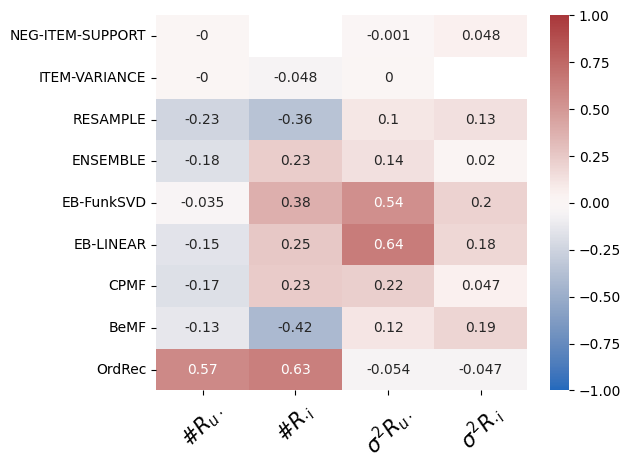

In [34]:
# Load
results = {}
for key in os.listdir('results'):
    results[key.replace('.pkl', '').replace('_', ' ')] = pickle.load(open(os.path.join('results', key), 'rb'))
results = dict(sorted(results.items()))
colors = [c for c in list(TABLEAU_COLORS)] + ['k']
colors = {k:c for k, c in zip(results, colors)}
lines = ['o', 'v', '^', '<', '>', 's', 'p', '+', 'x', '*']
lines = {k: '-' + l for k, l, in zip(results, lines)}
df = pd.DataFrame([results[key] for key in results], index=results.keys())
order = ['NEG-ITEM-SUPPORT', 'ITEM-VARIANCE', 'RESAMPLE', 'ENSEMBLE', 'EB-FunkSVD', 'EB-LINEAR', 'CPMF', 'BeMF', 'OrdRec']

# RMSE
keys = ['Baseline', 'ENSEMBLE', 'CPMF', 'BeMF', 'OrdRec']
tab = df.loc[keys, 'RMSE'].round(4)
print(tab)
tab.to_latex(buf='plots/RMSE.txt')

# Rating prediction uncertainty
keys = [key for key in order if key != 'Baseline']
tab = df.loc[keys, ['Pearson error x unc', 'Spearman error x unc', 'dw', 'RPI', 'Classification']].round(4)
print(tab)
tab.to_latex(buf='plots/ratings_unc.txt')

# RBR uncertainty
tab = pd.DataFrame([results[key]['Rating_rec'] for key in keys], index=keys)[['URI_rec', 'Unc_MAP_corr']].round(4)
print(tab)
tab.to_latex(buf='plots/rating_URI_UAC.txt')

# UBR uncertainty
keys = ['ENSEMBLE', 'EB-FunkSVD', 'EB-LINEAR', 'CPMF', 'BeMF', 'OrdRec']
tab = pd.DataFrame([results[key]['Uncertain_rec'] for key in keys], index=keys)['Unc_MAP_corr'].round(4)
print(tab)
tab.to_latex(buf='plots/uncertain_UAC.txt')

# Correlation plot
corr = np.empty((len(results)-1, 4))
for idx, key in enumerate(order):
    corr[idx, 0] = results[key]['User_unc_corr']['support']
    corr[idx, 1] = results[key]['Item_unc_corr']['support']
    corr[idx, 2] = results[key]['User_unc_corr']['variance']
    corr[idx, 3] = results[key]['Item_unc_corr']['variance']
corr = pd.DataFrame(corr, index=order, columns=[r'#$R_{u\cdot}$', r'#$R_{\cdot i}$', r'$\sigma^2R_{u\cdot}$', r'$\sigma^2R_{\cdot i}$'])
corr.loc['NEG-ITEM-SUPPORT', r'#$R_{\cdot i}$'] = np.nan
corr.loc['ITEM-VARIANCE', r'$\sigma^2R_{\cdot i}$'] = np.nan
sns.heatmap(corr.round(3), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.xticks(rotation=45, fontsize=15)
plt.tight_layout()
plt.savefig('plots/corr.pdf')



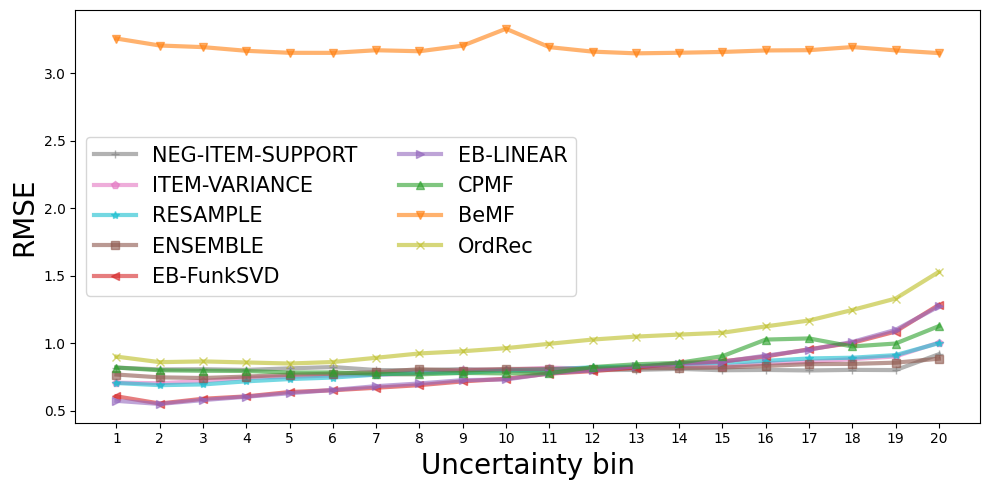

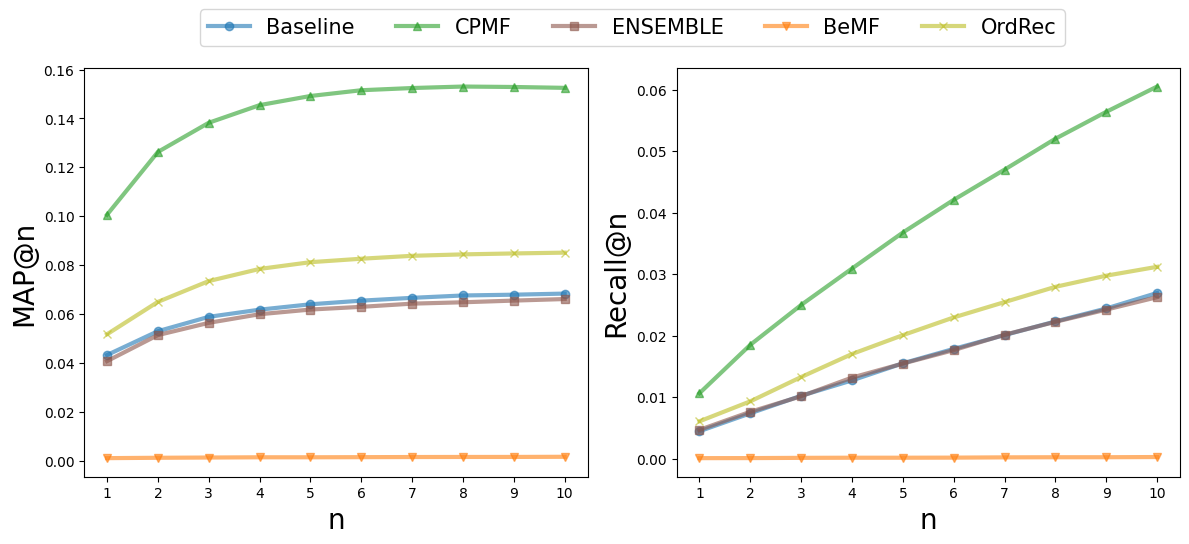

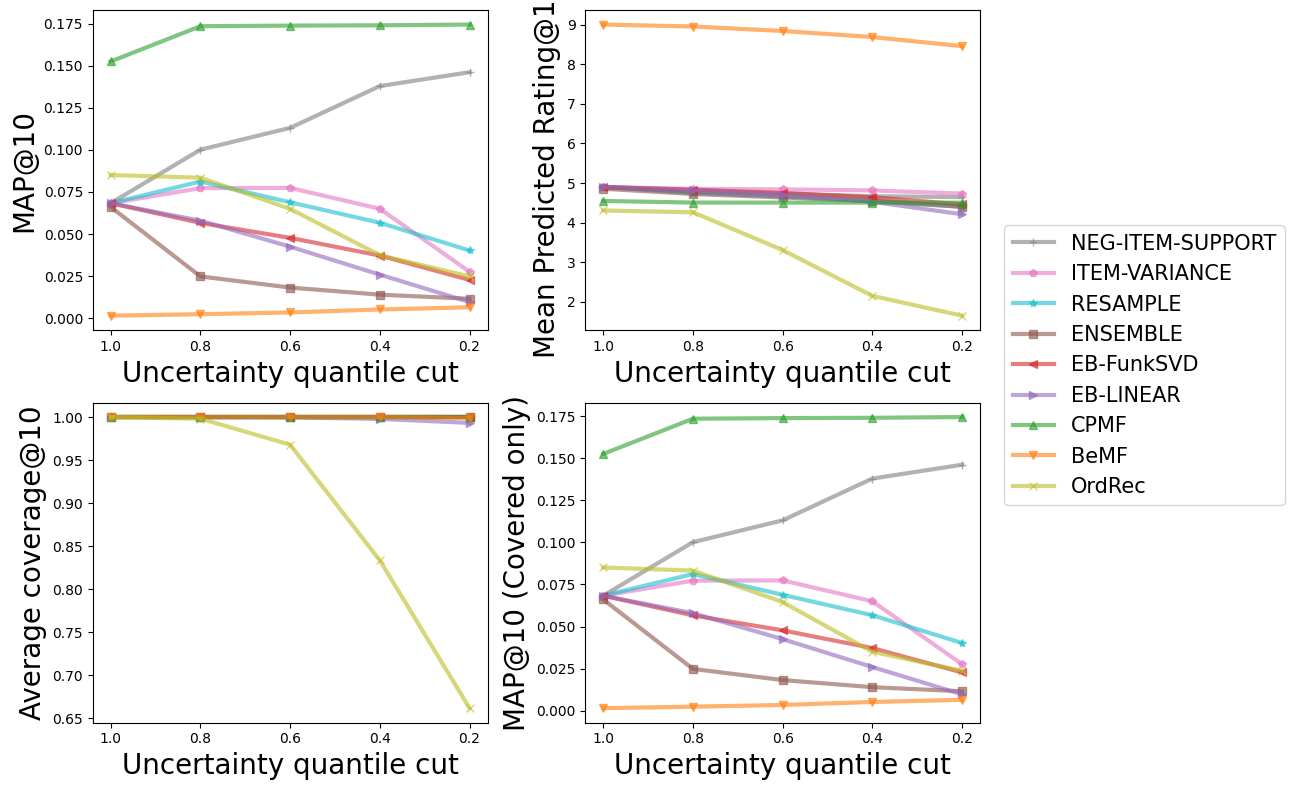

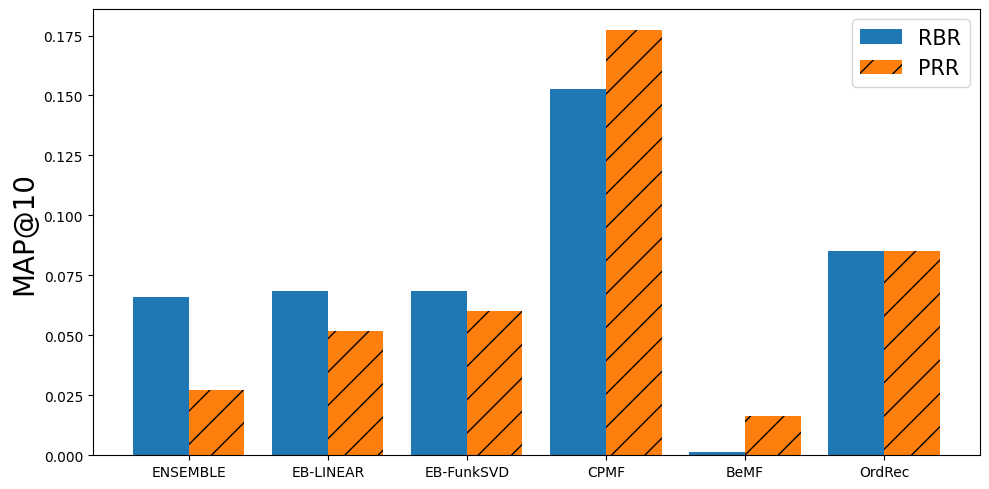

In [35]:
# Uncertainty-RMSE curve
f, ax = plt.subplots(figsize=(10, 5))
for key in order:
    ax.plot(np.arange(1, 21), results[key]['Quantile RMSE'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
ax.set_xticks(np.arange(1, 21))
ax.set_xlabel('Uncertainty bin', fontsize=20)
ax.set_ylabel('RMSE', fontsize=20)
ax.legend(ncol=2, fontsize=15)
f.tight_layout()
f.savefig('plots/RMSE-uncertainty.pdf')

# Top-K accuracy metrics
keys = ['Baseline', 'CPMF', 'ENSEMBLE', 'BeMF', 'OrdRec']
f, ax = plt.subplots(ncols=2, figsize=(12, 5), sharex=True)
for key in keys:
    ax[0].plot(np.arange(1, 11), results[key]['Rating_rec']['MAP'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[1].plot(np.arange(1, 11), results[key]['Rating_rec']['Recall'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
ax[0].set_xticks(np.arange(1, 11))
ax[0].set_xlabel('n', fontsize=20)
ax[0].set_ylabel('MAP@n', fontsize=20)
ax[1].set_xlabel('n', fontsize=20)
ax[1].set_ylabel('Recall@n', fontsize=20)
handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, fontsize=15, ncol=len(keys), bbox_to_anchor=(0.9, 1.1))
f.tight_layout()
f.savefig('plots/accuracy.pdf', bbox_inches="tight")

# Cuts
keys = [key for key in order if key != 'Baseline']
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for key in keys:
    ax[0, 0].plot(results[key]['Cuts']['MAP'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[0, 1].plot(results[key]['Cuts']['Relevance'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[1, 0].plot(results[key]['Cuts']['Coverage'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
    ax[1, 1].plot(results[key]['Cuts']['Map*'], lines[key], color=colors[key], label=key, linewidth=3, alpha=0.6)
ax[0, 0].set_xticks(range(5))
ax[0, 0].set_xticklabels(np.linspace(1, 0.2, 5).round(2))
ax[0, 0].set_xlabel('Uncertainty quantile cut', fontsize=20)
ax[0, 0].set_ylabel('MAP@10', fontsize=20)
ax[0, 1].set_xticks(range(5))
ax[0, 1].set_xticklabels(np.linspace(1, 0.2, 5).round(2))
ax[0, 1].set_xlabel('Uncertainty quantile cut', fontsize=20)
ax[0, 1].set_ylabel('Mean Predicted Rating@10', fontsize=20)
ax[1, 1].set_xticks(range(5))
ax[1, 1].set_xticklabels(np.linspace(1, 0.2, 5).round(2))
ax[1, 1].set_xlabel('Uncertainty quantile cut', fontsize=20)
ax[1, 1].set_ylabel('MAP@10 (Covered only)', fontsize=20)
ax[1, 0].set_xticks(range(5))
ax[1, 0].set_xticklabels(np.linspace(1, 0.2, 5).round(2))
ax[1, 0].set_xlabel('Uncertainty quantile cut', fontsize=20)
ax[1, 0].set_ylabel('Average coverage@10', fontsize=20)
handles, labels = ax[0, 0].get_legend_handles_labels()
f.legend(handles, labels, fontsize=15, bbox_to_anchor=(1.3, 0.725))
f.tight_layout()
f.savefig('plots/cuts.pdf', bbox_inches="tight")

# Rating prediction evaluation
keys = ['ENSEMBLE', 'EB-LINEAR', 'EB-FunkSVD', 'CPMF', 'BeMF', 'OrdRec']
a = {metric: {key: [results[key]['Rating_rec'][metric][-1]] + [results[key]['Uncertain_rec'][metric][-1]] 
              for key in keys} for metric in ['MAP', 'Recall']}
precision = pd.DataFrame(a['MAP'], index=['Standard', 'Uncertain']).T
f, ax = plt.subplots(figsize=(10, 5))
ax.bar(np.arange(6)-0.2, precision['Standard'], 0.4, label='RBR')
ax.bar(np.arange(6)+0.2, precision['Uncertain'], 0.4, label='PRR', hatch='/')
ax.set_xticklabels([''] + list(precision.index))
ax.set_ylabel('MAP@10', fontsize=20)
ax.legend(fontsize=15)
f.tight_layout()
f.savefig('plots/unc_rank.pdf')